# AST 4930 Week 2

## k-nearest neighbors & decision trees

### Let's load the scikit-learn module and load the Iris dataset.

In [1]:
#import scikit-learn datasets module
from sklearn import datasets

#load Iris data
iris = datasets.load_iris()

### Let's visualize the data. Petal width vs. Petal length

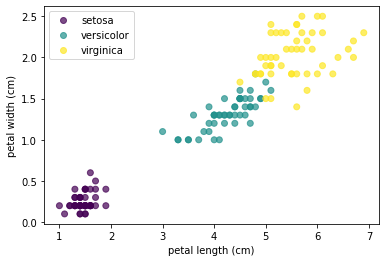

In [2]:
#import matplotlib.pyplot, and I will call it as "plt"
import matplotlib.pyplot as plt

#Let's plot sepal width vs. sepal length.
fig, ax = plt.subplots(figsize=(6, 4))

#This is to make sure that the color scale uses minimum = 0 & maximum = 2.
norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

#I changed colortable to viridis. Is it any better? Yellow might be faint on the screen?
plot = ax.scatter(iris.data[:,2], iris.data[:,3], alpha=0.7, c=iris.target, cmap='viridis', norm=norm)

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot.legend_elements()[0], iris.target_names)

### Let's first use kNN to make a model that can predict the class of new data points based on petal length and width.

In [3]:
from sklearn import neighbors

### Prepare the data for the ML algorithm.

In [4]:
from sklearn.model_selection import train_test_split

#Features in "X" (matrix), label in "y" (vector)
X = iris.data[:,2:]
y = iris.target

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Let's check the data shape

In [5]:
X_train.shape, X_test.shape

((112, 2), (38, 2))

### We can also visualize train/test datasets.

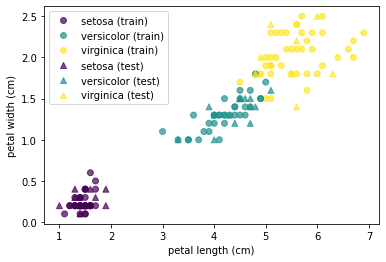

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', norm=norm, marker='^')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### Train the machine

In [7]:
# Train a kNN Model with k=5
model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

### Always try to look into the details of the result. If you don't, ML will stay as a black box for you!

In [8]:
model.score(X_test, y_test)

0.9736842105263158

In [9]:
print('True label:\n', y_test)
print('Prediction:\n', model.predict(X_test))

True label:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


### New data and model prediction

In [10]:
import numpy as np

new_data = np.array([[2, 1], [5, 1], [4.7, 2]])
model.predict(new_data)

array([0, 1, 2])

### Let's visualize to see if it makes sense.

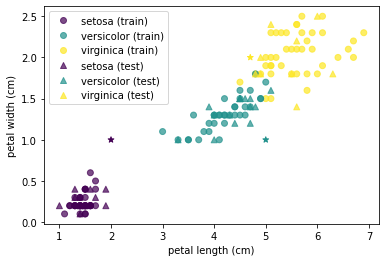

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', norm=norm, marker='^')

#This is the new data point.
ax.scatter(new_data[:,0], new_data[:,1], alpha=1, 
           c=model.predict(new_data), cmap='viridis', norm=norm, marker='*')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### Let's compute the decision boundary.

In [12]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print(x_min, x_max, y_min, y_max)

0.0 7.9 -0.9 3.5


In [13]:
#I just wanted to make sure that the values are physical. 
x_min = np.max([x_min, 0.])
y_min = np.max([y_min, 0.])

print(x_min, x_max, y_min, y_max)

0.0 7.9 0.0 3.5


### Make a two-dimensional grid using numpy.meshgrid

In [14]:
#See https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


### How does the mesh look like?

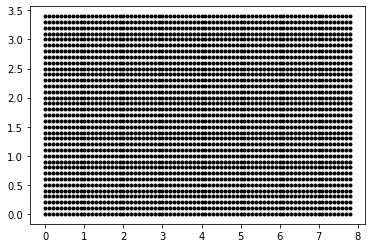

In [15]:
plt.plot(xpts, ypts, ".k")
plt.show()

### For each point, we make model prediction.

In [16]:
#This is to make a data structure that is consistent with the training/test datasets.
Z = model.predict(np.c_[xpts.ravel(), ypts.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(xpts.shape)

### Let's visualize the decision boundary.

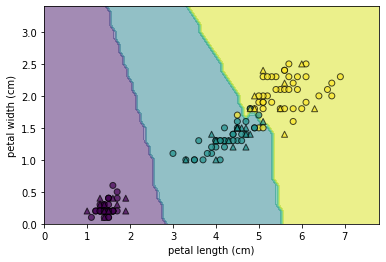

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))

#Two-dimensional contour plot.
#See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
ax.contourf(xpts, ypts, Z, alpha=0.5)

#Let's over-plot training/test data points.
plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', 
                        norm=norm, edgecolor='black')
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', 
                       norm=norm, marker='^', edgecolor='black')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

plt.savefig('iris_knn.png', transparent=True, dpi=300)

### Now, let's try Decision Trees.

In [20]:
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Visualize the tree structure.

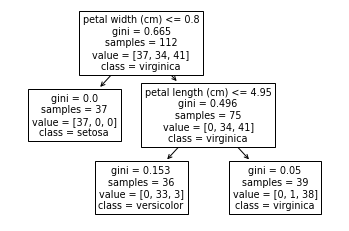

In [21]:
plot_tree(model, feature_names=iris.feature_names[2:], class_names=iris.target_names)
print('') #This is simply to suppress the massive output texts.

### Let's visualize the decision boundary.

In [22]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#I just wanted to make sure that the values are physical. 
x_min = np.max([x_min, 0.])
y_min = np.max([y_min, 0.])

#See https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

#This is to make a data structure that is consistent with the training/test datasets.
Z = model.predict(np.c_[xpts.ravel(), ypts.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(xpts.shape)

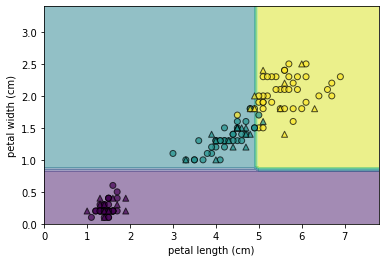

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.contourf(xpts, ypts, Z, alpha=0.5, cmap='viridis')

#Let's over-plot training/test data points.
plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', 
                        norm=norm, edgecolor='black')
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', 
                       norm=norm, marker='^', edgecolor='black')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

plt.savefig('iris_dt.png', transparent=True, dpi=300)

### Does DT work better if we increase max_depth? Let's fine tune hyperparameters.

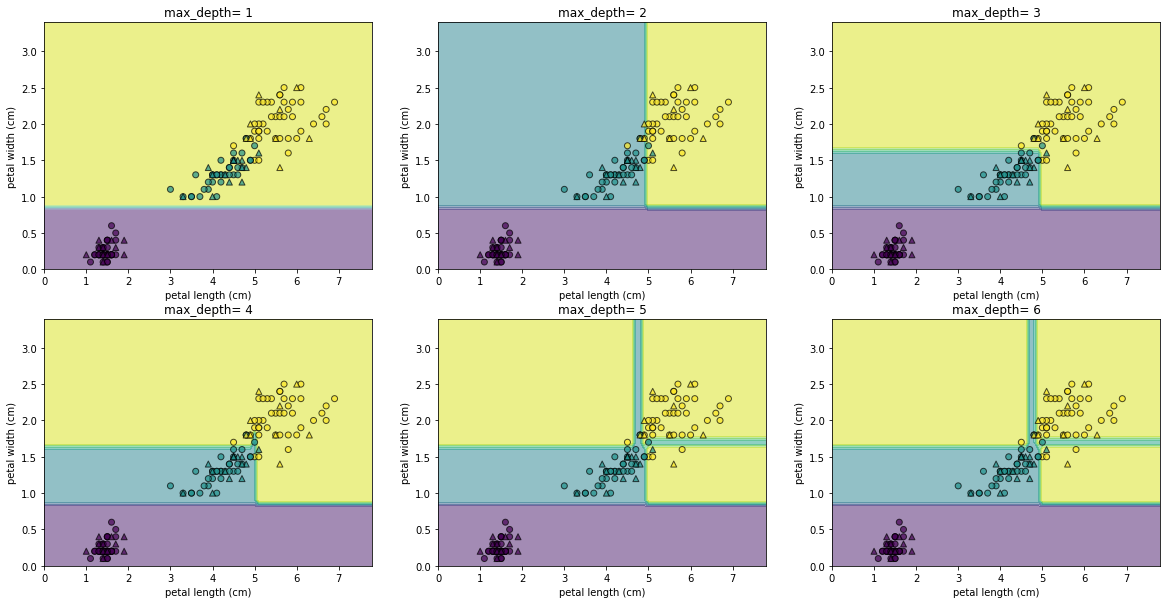

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

training_accuracy = []
test_accuracy = []

for i,ax in enumerate(axes.flat, start=1):
    model = DecisionTreeClassifier(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    Z = model.predict(np.c_[xpts.ravel(), ypts.ravel()])
    Z = Z.reshape(xpts.shape)
    ax.contourf(xpts, ypts, Z, alpha=0.5)
    plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', 
                        norm=norm, edgecolor='black')
    plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', 
                       norm=norm, marker='^', edgecolor='black')  
    ax.set_xlabel(iris.feature_names[2])
    ax.set_ylabel(iris.feature_names[3])
    ax.set_title('max_depth= {}'.format(i))

plt.savefig('iris_dt_max_depth.png', transparent=True, dpi=300)

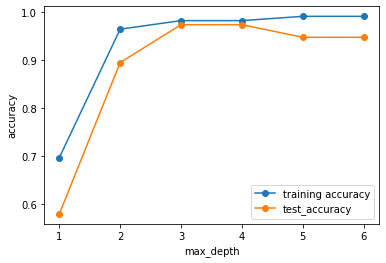

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

max_depth = np.arange(1,7)
max_depth

ax.plot(max_depth, training_accuracy, 'o-')
ax.plot(max_depth, test_accuracy, 'o-')

ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')
#ax.set_ylim(0,1)
ax.legend(['training accuracy','test_accuracy'])

plt.savefig('iris_dt_max_depth_accuracy.png', transparent=True, dpi=300)

### What about if we vary min_samples_leaf?

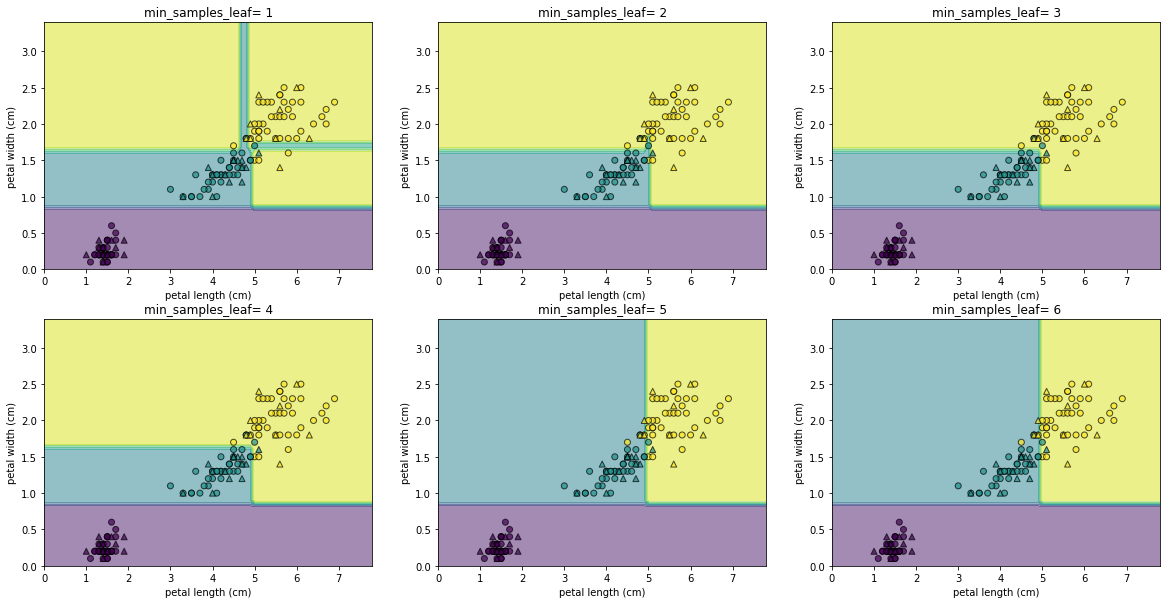

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

training_accuracy = []
test_accuracy = []

for i,ax in enumerate(axes.flat, start=1):
    model = DecisionTreeClassifier(min_samples_leaf=i, random_state=0)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    Z = model.predict(np.c_[xpts.ravel(), ypts.ravel()])
    Z = Z.reshape(xpts.shape)
    ax.contourf(xpts, ypts, Z, alpha=0.5)
    plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', 
                        norm=norm, edgecolor='black')
    plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', 
                       norm=norm, marker='^', edgecolor='black')  
    ax.set_xlabel(iris.feature_names[2])
    ax.set_ylabel(iris.feature_names[3])
    ax.set_title('min_samples_leaf= {}'.format(i))

plt.savefig('iris_dt_min_samples_leaf.png', transparent=True, dpi=300)

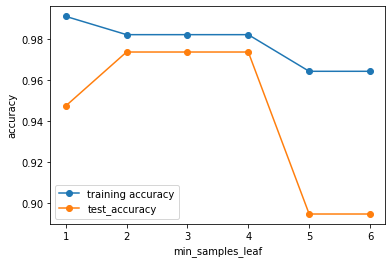

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

max_depth = np.arange(1,7)
max_depth

ax.plot(max_depth, training_accuracy, 'o-')
ax.plot(max_depth, test_accuracy, 'o-')

ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('accuracy')
#ax.set_ylim(0,1)
ax.legend(['training accuracy','test_accuracy'])

plt.savefig('iris_dt_min_samples_leaf_accuracy.png', transparent=True, dpi=300)

### One of the cool things about DT is that we can check feature importance.

In [31]:
print(iris.feature_names[2:])
print(model.feature_importances_)

['petal length (cm)', 'petal width (cm)']
[0.42665697 0.57334303]


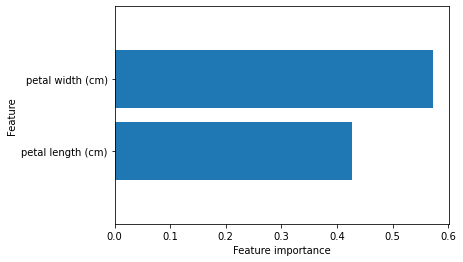

In [32]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names[2:])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)

### Let's use all the features now.

In [33]:
#load Iris data
iris = datasets.load_iris()

#Features in "X" (matrix), label in "y" (vector)
X = iris.data
y = iris.target

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Train DT
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
print(iris.feature_names)
print(model.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.         0.42232109 0.57767891]


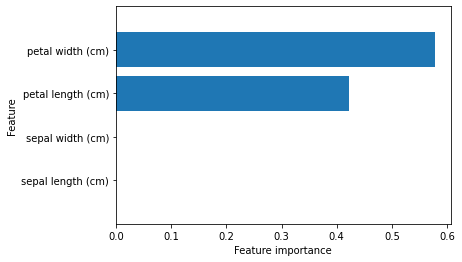

In [35]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)